In [22]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

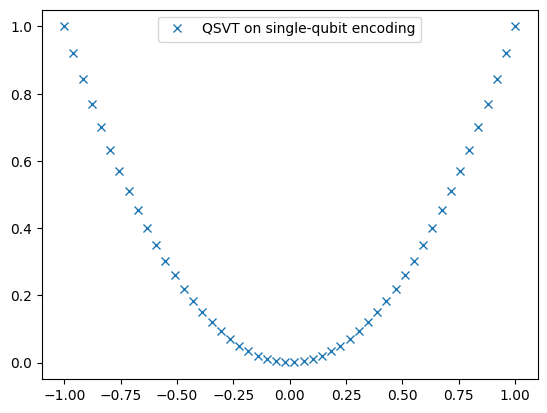

In [23]:
# Define target polynomial for QSVT
target_poly = [0, 0, 1]  # x^2 polynomial

# Define function to compute QSVT output
def qsvt_output(a):
    out = qml.matrix(qml.qsvt(a,  target_poly, encoding_wires=[0], block_encoding="embedding"))
    return out[0, 0]  # top-left entry only


# Compute QSVT outputs for a range of 'a' values
a_vals = np.linspace(-1, 1, 50)
qsvt = [np.real(qsvt_output(a)) for a in a_vals]  # neglect small imaginary part

# Plot results
plt.plot(a_vals, qsvt, "x", label="QSVT on single-qubit encoding")
plt.legend()
plt.show()


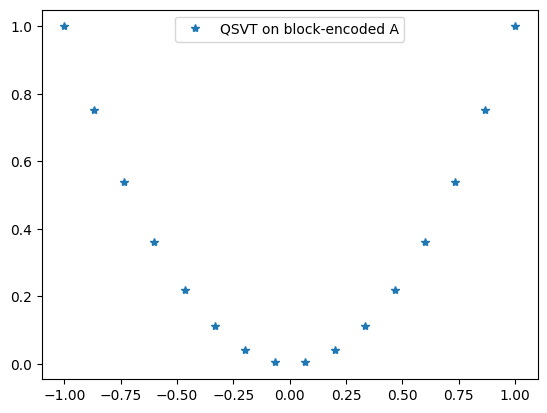

In [24]:
# Now apply QSVT to a block-encoded matrix

eigvals = np.linspace(-1, 1, 16)
A = np.diag(eigvals)  # 16-dim matrix

# Block-encode A in 5 qubits
wire_order = list(range(5))
U_A = qml.matrix(qml.qsvt, wire_order=wire_order)(
    A, target_poly, encoding_wires=wire_order, block_encoding="embedding"
    )

# Retrieve transformed eigenvalues
qsvt_A = np.real(np.diagonal(U_A))[:16]

# Plot results
plt.plot(eigvals, qsvt_A, "*", label="QSVT on block-encoded A")
plt.legend()
plt.show()
